# Color gradients in Python
By: Michael Silverstein

Created on: 2/22/18

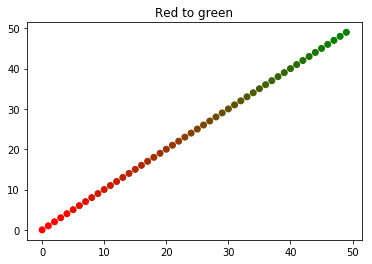

In [191]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

# Compute gradient between red and black and plot (this uses a function we'll get to later)
n = 50
grad = colorgrad('red','green',n)
plt.scatter(range(n),range(n),c=grad)
plt.title('Red to green')
plt.show()

## RGB Triplets
Colors can be represented by *RGB triplets*. This name is referring to the amount of red, green, and blue required to generate a certain color. For example, 
$$Color=(R,G,B)$$
$$White=(1,0,0)$$
$$Black=(0,0,0)$$
$$Red=(1,0,0)$$
$$Green=(0,1,0)$$
$$Blue=(0,0,1)$$
$$Magenta=(1,0,1)$$
Let's take a look at how we can pass these vectors to `matplotlib` to produce colors

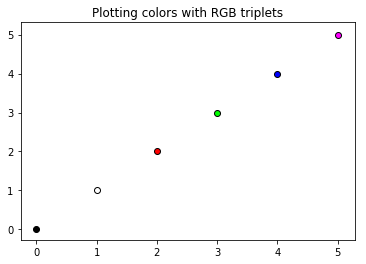

In [98]:
colors = [[0,0,0],[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,0,1]]
n = len(colors)
for i in range(n):
    plt.scatter(i,i,c=colors[i],edgecolor='k')
plt.title('Plotting colors with RGB triplets')
plt.show()

# Colors as vectors
## 2D
If we want to generate a smooth gradient from one color to another, we can consider each color as its vector representation and then walk along the line that connects those two vectors. For simplicity's sake, let's pretend we can represent our colors as 2D vectors so we can more easily visualize this concept. Let's consider the two points: (3,2) and (2,5):

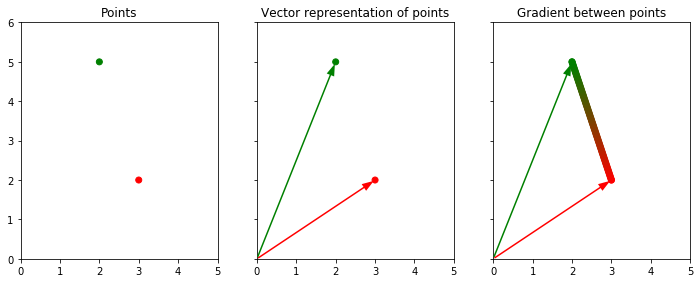

In [173]:
points = np.array(
        [[3,2],
         [2,5]])
fig, axs = plt.subplots(ncols = 3,sharex=True, sharey=True, figsize=(12,12))
# Plot points
colors = ['red','green']
for i in range(len(axs)):
    axs[i].scatter(points[:,0],points[:,1],c=colors)
    # Draw arrows on second and third plot
    if i > 0:
        for p,c in zip(points,colors):
            axs[i].annotate('',xytext=[0,0],xy=p,arrowprops={'facecolor':c,'shrink':.01,'width':1.5,'headwidth':8,\
                                                            'edgecolor':'none'})
    # Draw gradient using previously made gradient
    if i == 2:
        # Line from point 0 to point 1 (this is a sneak peak of how a gradient is calculated!)
        z = points[1]-points[0]
        line = z*np.linspace(0,1,len(grad)).reshape(-1,1)+points[0]
        axs[i].scatter(line[:,0],line[:,1],c=grad)  
    axs[i].set(adjustable='box-forced',aspect='equal')
axs[0].set_title('Points')
axs[1].set_title('Vector representation of points')
axs[2].set_title('Gradient between points')
plt.xlim(0,5)
plt.ylim(0,6)
plt.show()

## 3D
Now that we have some intuition of what it means to represent colors as vectors, let's take a look at a color gradient in "true" space. Since we can represent colors by 3D vectors (R,G,B), we can plot the location of two colors in 3D space and then plot the gradient between these two colors. 

Let's use red (1,0,0) and some other color (.7,.6,.3). We will draw a line to these points to represent where these colors lie within the RGB world.

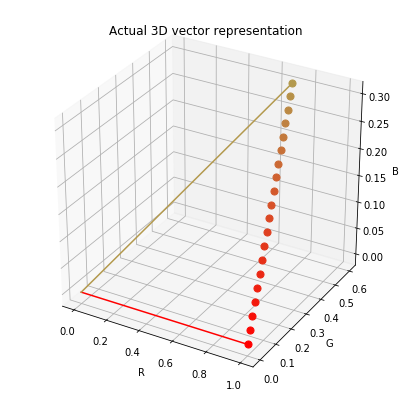

In [250]:
from mpl_toolkits.mplot3d import Axes3D

data = np.array([[0,0,0],[1,0,0],[.7,.6,.3]])
N = 20
g = colorgrad('red',data[2],N)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
# Plot red
ax.plot3D(data[:2,0],data[:2,1],data[:2,2],color=data[1])
# Plot other color
ax.plot3D(data[[0,2],0],data[[0,2],1],data[[0,2],2],color=data[2])
# Plot gradient
for i in g:
    ax.scatter3D(i[0],i[1],i[2],c=i,s=50)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.title('Actual 3D vector representation')
plt.show()

Notice that red (1,0,0) lies entirely on the *R* axis because red is only comprised red components, while the other colors lies off any axis.

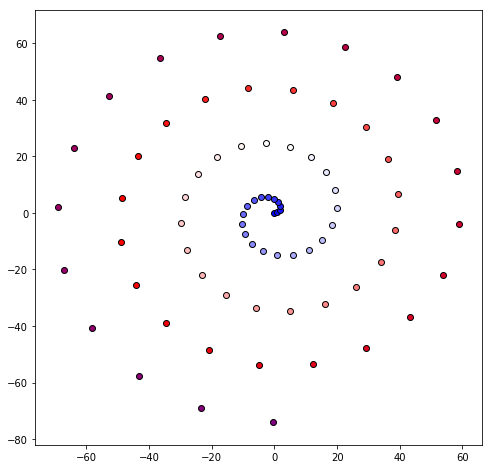

In [21]:
b2w = colorgrad('blue','white',25)
w2r = colorgrad('white','red',25)
r2p = colorgrad('red','purple',25)
combo = np.vstack([b2w,w2r,r2p])
plt.figure(figsize=(8,8))
for i in range(75):
    plt.scatter(i*np.cos(i/np.pi),i*np.sin(i/np.pi),color=combo[i],edgecolor='k')
plt.show()

In [102]:
def colorgrad(color1, color2, n):
    """
    Creates color gradient from `color1` to `color2` with RGB triplets in `n` intervals
    Input:
    | color{1,2} <list, array, str>: Colors can be entered as array-like, matplotlib color, or hex (uppercase)
    """

    def normalize_array(v):
        # Normalize v such that sum(v) = 3
        norm_factor = np.linalg.norm(v) / np.sqrt(3)
        return v / norm_factor

    # String -> #Hex
    c_dict_hex = matplotlib.colors.cnames
    cnames = c_dict_hex.keys()
    chex = c_dict_hex.values()
    # Dictionary for string -> RGB
    c_dict_rgb = {k: matplotlib.colors.to_rgb(v) for k, v in c_dict_hex.items()}
    # hex -> rgb
    c_dict_hex = {h: c_dict_rgb[s] for s, h in c_dict_hex.items()}

    # If list, convert to array
    if type(color1) == list or type(color1) == tuple:
        color1 = np.array(color1)
        if color1.sum() > 3:
            color1 = normalize_array(color1)
    if type(color2) == list or type(color2) == tuple:
        color2 = np.array(color2)
        if color2.sum() > 3:
            color2 = normalize_array(color2)

    # If string, convert to array
    if type(color1) == str:
        # If matplotlib color name
        if color1 in cnames:
            color1 = np.array(c_dict_rgb[color1])
        # If hex
        elif color1[0] == '#':
            color1 = color1.upper()
            if color1 in chex:
                color1 = np.array(c_dict_hex[color1])
        else:
            print('"%s" is not an accepted color' % color1)
            return
    if type(color2) == str:
        if color2 in cnames:
            color2 = np.array(c_dict_rgb[color2])
        elif color2[0] == '#':
            color2 = color2.upper()
            if color2 in chex:
                color2 = np.array(c_dict_hex[color2])
        else:
            print('"%s" is not an accepted color' % color2)
            return
    # Compute gradient
    diff = color2 - color1
    grad = diff * np.linspace(0, 1, n).reshape(-1, 1) + color1
    return grad